## Kymograph Cluster Code

should I add a retry call by default?

In [1]:
import trenchripper as tr

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/dask_jobqueue/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [11]:
!sbatch -p transfer -t 0-12:00 --wrap="rsync -r /n/files/SysBio/PAULSSON\ LAB/Daniel/Image_Data/Bacillus_Project/2019-05-10_bacillus_training_data /n/scratch2/de64/2019-05-10_bacillus_training_data/"

Submitted batch job 41036101


#### Start Dask

In [12]:
# kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='2GB')
kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


In [13]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.183:53051 Dashboard: http://10.120.16.183:47733/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


#### Perform Extraction

In [18]:
# hdf5_extractor = tr.ndextract.hdf5_fov_extractor("/n/scratch2/de64/full_pipeline_test/40x_Ph2_Test_1.5.nd2","/n/scratch2/de64/full_pipeline_test")
hdf5_extractor = tr.ndextract.hdf5_fov_extractor("/n/scratch2/de64/2019-05-10_bacillus_training_data/ChannelPhase,RFP_Seq0000.nd2","/n/scratch2/de64/2019-05-10_bacillus_training_data")

In [20]:
hdf5_extractor.fov_metadata[:5]

,fov,t,x,y,z
0,0,21603.491950,5339.7,-3886.6,5528.84
1,0,22054.492848,5340.9,-3886.6,5529.20
2,0,22504.465272,5341.1,-3886.7,5529.28
3,0,22954.496112,5341.1,-3886.7,5529.18
4,0,23404.607544,5341.1,-3886.7,5529.02


In [21]:
fov_list = list(range(0,40))

In [22]:
hdf5_extractor.writemetadata()

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/tables/path.py:157: NaturalNameWarning: object name is a Python keyword: 'global'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In [23]:
kymo_controller.mapfovs(hdf5_extractor.extract_fov,fov_list)

In [24]:
kymo_controller.retry_failed()

In [ ]:
# props = kymo_controller.daskclient.gather(kymo_controller.futures) #this will hang until all futures are done

In [17]:
# hdf5_extractor.writemetadata()
hdf5_extractor.extract_fov(57)

In [4]:
# test = tr.utils.pandas_hdf5_handler("/n/scratch2/de64/full_pipeline_test/metadata.hdf5")

#### End Dask, Cancel Jobs

In [3]:
kymo_controller.shutdown()

In [ ]:
#scancel --name=dask-worker --user=de64

#### Generate Kymographs

#### Start Dask

In [2]:
kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

In [3]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.182:44941 Dashboard: http://10.120.16.182:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [13]:
headpath = "/n/scratch2/de64/full_pipeline_test"
all_channels = ["channel_RFP","channel_BF"]

kymo = tr.kymograph.kychunker(headpath=headpath,all_channels=all_channels,trench_len_y=270,padding_y=40,trench_width_x=30,\
                 t_chunk=25,t_range=(0,-1),y_percentile=90,y_min_edge_dist=80,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.60,\
                 expected_num_rows=2,orientation_detection=0,x_percentile=95,background_kernel_x=(21,1),smoothing_kernel_x=(9,1),otsu_nbins=50,otsu_scaling=0.7)

In [14]:
# fov_list = list(range(15)) + list(range(67,80))
# fov_list = list(range(20)) + list(range(60,80))
fov_list = list(range(0,80))

In [15]:
kymo_controller.mapfovs(kymo.generate_kymograph,fov_list,retries=1)

In [8]:
kymo_controller.retry_failed()

Worker tcp://10.120.16.72:39901 restart in Job 40875103. This can be due to memory issue.
Worker tcp://10.120.16.81:48675 restart in Job 40875091. This can be due to memory issue.
Worker tcp://10.120.16.51:46388 restart in Job 40875101. This can be due to memory issue.
Worker tcp://10.120.16.65:37642 restart in Job 40875083. This can be due to memory issue.
Worker tcp://10.120.16.240:58150 restart in Job 40875087. This can be due to memory issue.
Worker tcp://10.120.16.160:48348 restart in Job 40875076. This can be due to memory issue.
Worker tcp://10.120.16.238:49592 restart in Job 40875086. This can be due to memory issue.
Worker tcp://10.120.16.45:54906 restart in Job 40875081. This can be due to memory issue.
Worker tcp://10.120.16.245:39415 restart in Job 40875080. This can be due to memory issue.
Worker tcp://10.120.16.182:52858 restart in Job 40875096. This can be due to memory issue.
Worker tcp://10.120.16.182:35569 restart in Job 40875085. This can be due to memory issue.
Work

In [9]:
kymo.collect_metadata(fov_list,use_archive=False,overwrite_archive=True)

fovs processed: 79/80
lanes processed: 136
trenches processed: 7507
lanes/fov: 1.7215189873417722
trenches/fov: 95.0253164556962
failed fovs: [77]


In [4]:
kymo.collect_metadata(fov_list,use_archive=True,overwrite_archive=False)

fovs processed: 79/80
lanes processed: 136
trenches processed: 7507
lanes/fov: 1.7215189873417722
trenches/fov: 95.0253164556962
failed fovs: [77]


maybe an estimate of memory usage

In [18]:
kymo.generate_kymograph(57)

/home/de64/TrenchRipper/trenchripper/utils.py:300: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [1]:
import h5py
from matplotlib import pyplot as plt

In [8]:
# for fov in fov_list:
for fov in [12,63]:
    print(fov)
    with h5py.File("/n/scratch2/de64/full_pipeline_test/hdf5/fov_"+str(fov)+".hdf5") as testfile:
        data = testfile['channel_RFP']
        arr = data[:,:,0]

12
63


In [7]:
arr.shape

(2048,)

In [1]:
import pandas as pd

In [6]:
meta_handle = tr.utils.pandas_hdf5_handler("/n/scratch2/de64/full_pipeline_test/metadata.hdf5")
kymo_meta = meta_handle.read_df("kymo")

In [10]:
kymo_meta[kymo_meta["fov"]==5]

,fov,lane,trench,timepoints,time (s),lane orientation,y (local),x (local),y (global),x (global)
0,5,0,0,0,8.705783,bottom,179.151263,3.684902,-2826.448737,4673.084902
1,5,0,0,1,247.945007,bottom,178.609366,4.010040,-2826.990634,4673.410040
2,5,0,0,2,487.845095,bottom,178.609366,4.118420,-2827.090634,4673.518420
3,5,0,0,3,727.915919,bottom,178.717745,4.226799,-2826.882255,4673.626799
4,5,0,0,4,967.885631,bottom,178.826125,4.226799,-2826.873875,4673.626799
5,5,0,0,5,1207.842839,bottom,178.934504,4.335179,-2826.765496,4673.735179
6,5,0,0,6,1447.847807,bottom,178.934504,4.443558,-2826.765496,4673.843558
7,5,0,0,7,1687.838375,bottom,178.717745,4.443558,-2826.982255,4673.843558
8,5,0,0,8,1927.856087,bottom,178.609366,4.335179,-2827.090634,4673.635179
9,5,0,0,9,2167.928783,bottom,178.717745,4.335179,-2826.682255,4673.635179


In [11]:
import h5py
from matplotlib import pyplot as plt
h5py_handle = h5py.File("/n/scratch2/de64/full_pipeline_test/kymo/kymo_5.hdf5","r")

In [12]:
data = h5py_handle['0/channel_RFP']

In [13]:
data.shape

(55, 310, 30, 25)

In [14]:
data.chunks

(1, 310, 30, 1)

In [15]:
arr = data[:,:,0]

In [17]:
h5py_handle.close()

In [ ]:
print("moo")

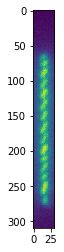

In [32]:
plt.imshow(h5py_handle["0/channel_RFP"][0,:,:,0])

In [51]:
h5py_handle["0/channel_RFP"].chunks

(1, 310, 30, 1)

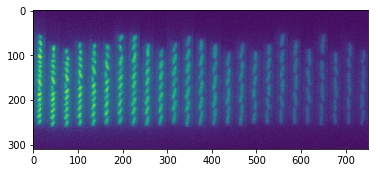

In [16]:
kymo_handle = tr.utils.kymo_handle()
kymo_handle.import_wrap(h5py_handle["0/channel_RFP"][39])
plt.imshow(kymo_handle.return_unwrap())

#### Generate Segmentation

#### Start Dask

In [4]:
kymo_controller = tr.cluster.dask_controller(walltime='01:00:00',local=False,n_workers=80,memory='1GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

In [5]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.182:49411 Dashboard: http://10.120.16.182:8787/status,Cluster Workers: 13 Cores: 13 Memory: 13.00 GB


In [14]:
kymo_controller.daskclient.restart()

distributed.client - ERROR - Restart timed out after 6.000000 seconds


Client Scheduler: tcp://10.120.16.182:47301 Dashboard: http://10.120.16.182:8787/status,Cluster Workers: 24 Cores: 24 Memory: 24.00 GB


distributed.scheduler - ERROR - Nannies didn't report back restarted within timeout.  Continuuing with restart process
tornado.application - ERROR - Exception in Future <Future finished exception=CommClosedError("in <closed TCP>: Stream is closed: while trying to call remote method 'restart'")> after timeout
Traceback (most recent call last):
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/distributed/comm/tcp.py", line 181, in read
    n_frames = yield stream.read_bytes(8)
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/tornado/gen.py", line 729, in run
    value = future.result()
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/distributed/core.py", line 580, in send_recv_from_rpc
    result = yield send_recv(comm=comm, op=key, **kwargs)
  File "/

In [6]:
segment = tr.segment.fluo_segmentation_cluster("/n/scratch2/de64/full_pipeline_test","channel_RFP",smooth_sigma=0.75,wrap_pad=3,hess_pad=4,min_obj_size=30,cell_mask_method='local',\
                 cell_otsu_scaling=1.,local_otsu_r=15,edge_threshold_scaling=1.,threshold_range=20,threshold_step=10,convex_threshold=0.8)

In [7]:
fov_list = list(set(range(0,80))-set([77]))

In [8]:
kymo_controller.mapfovs(segment.generate_segmentation,fov_list)

In [3]:
segment.generate_segmentation(10)

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-735f591619c3>", line 1, in <module>
    segment.generate_segmentation(10)
  File "/home/de64/TrenchRipper/trenchripper/segment.py", line 242, in generate_segmentation
    hdf5_dataset = self.segment(kymo_arr)
  File "/home/de64/TrenchRipper/trenchripper/segment.py", line 170, in segment
    cell_mask = self.cell_region_mask(working_img,method=self.cell_mask_method,cell_otsu_scaling=self.cell_otsu_scaling,t_tot=t_tot,local_otsu_r=self.local_otsu_r)
  File "/home/de64/TrenchRipper/trenchripper/segment.py", line 56, in cell_region_mask
    local_otsu = sk.filters.rank.otsu(img_arr, otsu_selem)
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/skimage/filters/rank/generic.py", line 1003, in otsu
    shift_y=shift_y)
  Fi

KeyboardInterrupt: 

In [13]:
kymo_controller.daskclient.get_futures_error(kymo_controller.futures[1])

(<function trenchripper.cluster.dask_controller.mapfovs.<locals>.mapallfovs(fov_number, function=<bound method fluo_segmentation_cluster.generate_segmentation of <trenchripper.segment.fluo_segmentation_cluster object at 0x7fbbc7cd7550>>)>,
 (1,),
 {},
 ())

#### End Dask, Cancel Jobs

In [9]:
kymo_controller.shutdown()

In [4]:
import h5py
from matplotlib import pyplot as plt

In [5]:
data = h5py.File("/n/scratch2/de64/full_pipeline_test/segmentation/seg_0.hdf5")

In [6]:
kymo_handle = tr.utils.kymo_handle()

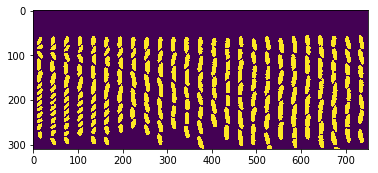

In [7]:
kymo_handle.import_wrap(data['0'][30])
plt.imshow(kymo_handle.return_unwrap())

### NOTE

- **How to deal with some fovs having a different number of rows than other fovs??? Try to make more flexible...**

maybe add a kymograph viewer here

### Note
There may be an issue where hdf5 files do not close properly on crashes...

In [7]:
# props = kymo_controller.daskclient.gather(kymo_controller.futures) #this will hang until all futures are done

#### End Dask, Cancel Jobs

In [14]:
kymo_controller.shutdown()

In [ ]:
#scancel --name=dask-worker --user=de64

#### Note: access request to the transfer partition pending; automate this bit later

In [10]:
import subprocess

in_path = "/n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/test"
out_path = "/n/scratch2/de64/for_sylvia/"
wrap_str = "rsync " + in_path + " " + out_path
cmd_str = 'sbatch -p transfer -t 0-12:00 --wrap="' + wrap_str + '"'

subprocess.check_output(cmd_str,
                shell=True)

CalledProcessError: Command 'sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/test /n/scratch2/de64/for_sylvia/"' returned non-zero exit status 1.

In [6]:
cmd_str

'sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/2019-02-08_bacillus_mbm_top_s750_bottom /n/scratch2/de64/for_sylvia/"'

In [11]:
!sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON\LAB/Daniel/Image_Data/Bacillus_Project/test /n/scratch2/de64/for_sylvia/"

sbatch: error: Batch job submission failed: User's group not permitted to use this partition


#### Note: need to find a way to associate lanes from init barcoding snapshot with imaging lanes

plan:
- extract and segment (with phase) barcoding file
- extract and segment experiemnt file
- for both, note x positions of t=0 trenches
- compare these values to map trenches to eachother...